### GW tutorial 2: Detector noise and GW150914

Author: Melissa Lopez

Email: m.lopez@uu.nl

Note that we are importing some packages to be able to read the data.

In [3]:
!pip install pycbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 24.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [5]:
%matplotlib inline

from pycbc.catalog import Merger
import pycbc.psd
import pylab
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.11/dist-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


In the previous part we have seen the detector response to gravitational waves (GW). Currently, we have three ground-based detectors: LIGO Hanford (H1), LIGO Livingston (L1) and Virgo (V1). But what does the data actually look like?

To answer this question we are going to take a look at the first detection: **GW150914**. Let's load the data from L1

In [6]:
m = Merger('GW150914')
ifo = 'L1'
data = m.strain(ifo)
print(data)

[-1.00432555e-18 -9.58114996e-19 -9.03059379e-19 ... -1.10862808e-18
 -1.13349772e-18 -1.12487097e-18]


**Exercise 1:** We can see that this object is a PyCBC timeseries, and as such you can check what their atributes are (see [here](https://pycbc.org/pycbc/latest/html/pycbc.types.html#module-pycbc.types.timeseries)). Let's check some of them.

- How much is the duration of the time series?

- How much is its sampling rate?

- How many data points does it have?

- How much is $\Delta_{f}$ and $\Delta_{t}$? Can you find a relation between these and the number of data points?

_Hint:_ $\Delta_{f} = 1/duration$ and  $\Delta_{t} = 1/sample\_rate$

In [7]:
#How much is the duration of the time series?
print (f"duration of the time series: {data.duration}\n")
#How much is its sampling rate?
print (f"sampling rate: {data.sample_rate}\n")
#How many data points does it have?
print (f"amount of data points: {len(data)}\n")

#How much is  Δ𝑓  and  Δ𝑡 ?
delta_f = 1/data.duration
delta_t = 1/data.sample_rate
#Can you find a relation between these and the number of data points?
data_point_deno= 1/len(data)

print (f"delta f: {delta_f}")
print (f"delta t: {delta_t}\n")

print (f"the product of the deltas: {delta_t*delta_f}")
print (f"1/amount of data points: {data_point_deno}")
print ("so the relation is: delta t * delta f = 1/amount of data points")




duration of the time series: 32.0

sampling rate: 4096.0

amount of data points: 131072

delta f: 0.03125
delta t: 0.000244140625

the product of the deltas: 7.62939453125e-06
1/amount of data points: 7.62939453125e-06
so the relation is: delta t * delta f = 1/amount of data points


The previous magnitudes are key parameters of the timeseries. Now, let's plot the actual data to see what it looks like.

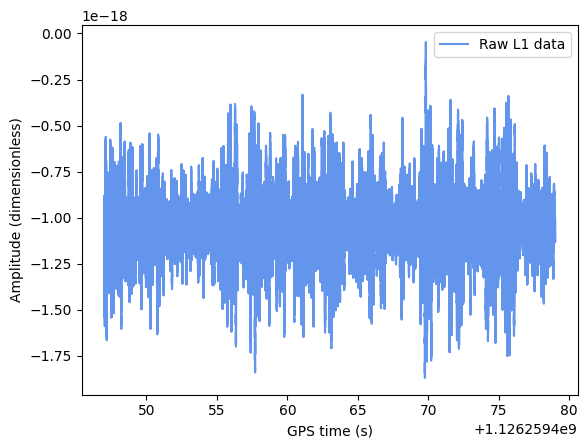

In [ ]:
#Plot with x axis: data.sample_times
#and y axis: data
plt.plot(data.sample_times, data, label='Raw L1 data', color='cornflowerblue')
plt.xlabel('GPS time (s)')
plt.ylabel('Amplitude (dimensionless)')
plt.legend()

In GW we use the GPS time to determine at what time the GW signals reached Earth. You can see that the amplitude of this data is super small, $\mathcal{O}(10^{-18})$! GW interferometers are able to detect a change in distance of ~1/10,000th the size of a proton.

But, where is GW190514? We cannot see it (yet) as there are many different contributions from the detector. The detector has a given "noise budget" given  by the power spectral density (PSD), $S_{n}(f)$, according to its specific design.

**Exercise 2**: Estimate the PSD of the data using `filter_psd` (see [here](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.filter_psd)) and plot it. Limit your plot according to the minimum frequency (say, 1 Hz) and  the Nyquist frequency.

_Hint_: Note that the PSD is a frequency series.

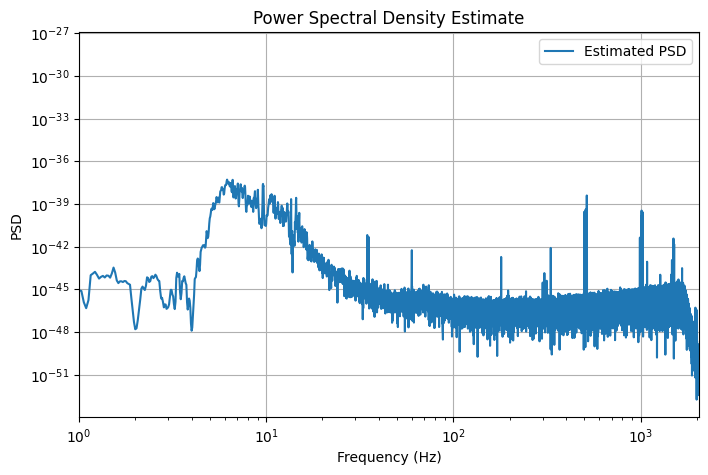

In [33]:
#Defining the Nyquist frequency.
Nyquist = data.sample_rate / 2

#y axis apllying the psd on the data
psd = data.filter_psd(data.duration, data.delta_f, 1)

#x axis
freq = psd.get_sample_frequencies()

#Ploting
plt.figure(figsize=(8, 5))
plt.loglog(freq ,psd, label="Estimated PSD")
plt.xlim(1, Nyquist)  # minimum frequency: 1 Hz, to Nyquist
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD")
plt.title("Power Spectral Density Estimate")
plt.legend()
plt.grid()
plt.show()


The PSD shows us what are the different contributions of the detector noise.
While we computed the PSD from 1 Hz, you can see that there is a weird behaviour for frequencies < 5 Hz. This is because the detector is not calibrated at these frequencies, so our analysis needs to start at higher frequencies. For current ground based detectors, we usually start at 10 Hz or higher, depending on the source.

GW signals are tiny, so with this much noise we won't be able to see GW150914. To "flatten" all frequency contributions we whiten the data.

**Exercise 3:** We can whiten the data with [this](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.whiten) function. Use `segment_duration = 4` and `max_filter_duration=4`.

- Plot the whitened data next to the raw detector noise. What differences can you see?

- Estimate the PSD of the whitened data. Plot it in the same graph as the raw PSD. What differences can you see?


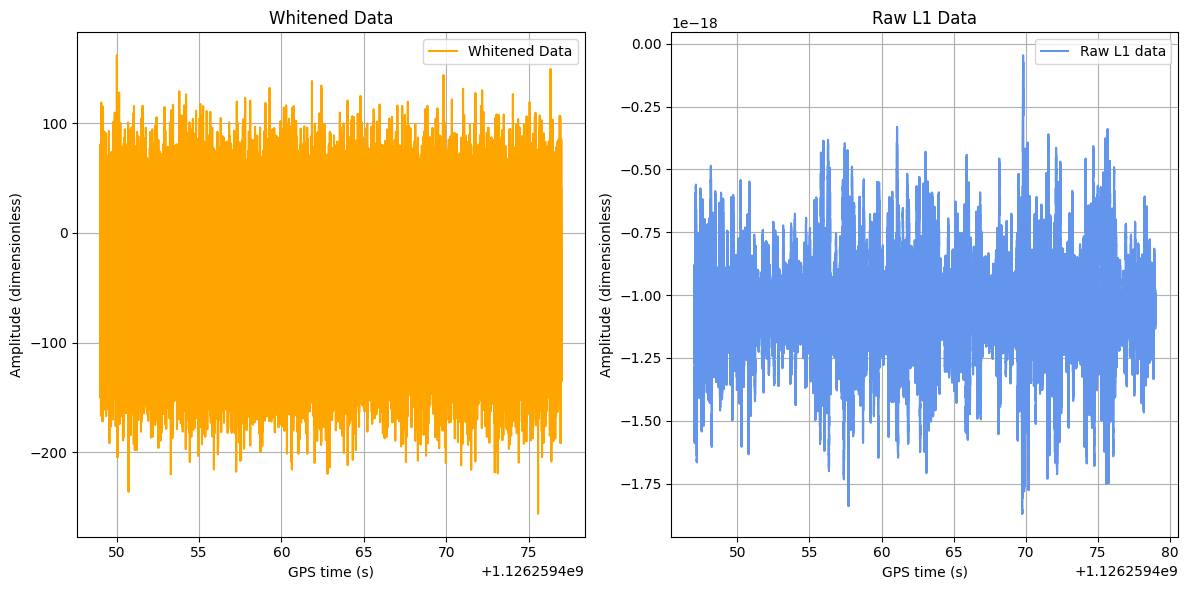

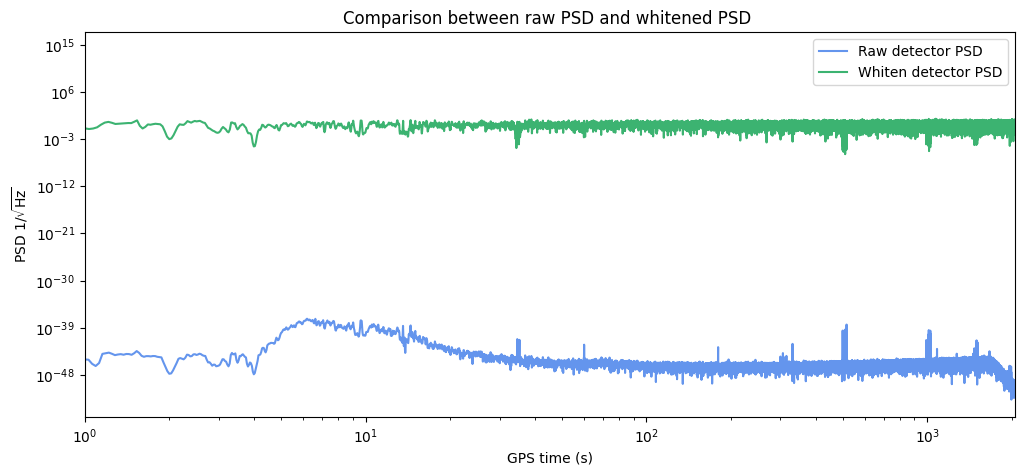

In [64]:
#-----Plot the whitened data next to the raw detector noise.------
#Apply the whiten function to the data (x axis)
whiten_d=data.whiten(segment_duration = 4, max_filter_duration=4, trunc_method='hann', remove_corrupted=True, low_frequency_cutoff=None, return_psd=False)

#y axis
frequ = whiten_d.sample_times

#Create a figure with two subplots
plt.figure(figsize=(12, 6))

#Subplot 1: whitened data
plt.subplot(1, 2, 1)
plt.plot(frequ, whiten_d, label="Whitened Data", color='orange')
plt.xlabel('GPS time (s)')
plt.ylabel('Amplitude (dimensionless)')
plt.title('Whitened Data')
plt.legend()
plt.grid(True)

#Subplot 2: raw data
plt.subplot(1, 2, 2)  # (rows, columns, index)
plt.plot(data.sample_times, data, label='Raw L1 data', color='cornflowerblue')
plt.xlabel('GPS time (s)')
plt.ylabel('Amplitude (dimensionless)')
plt.title('Raw L1 Data')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#What differences can you see?
#Whitened data looks more uniform, while raw data has stronger noise fluctuations.
#Whitening seems to reduce the influence dominant noise, making the signal more evenly distributed across time.
#Some parts of the whitened data have higher amplitude since noise was suppressed there.

#------Estimate the PSD of the whitened data------.
#apply the psd function to the whitened data.
psd_whitened = whiten_d.filter_psd(whiten_d.duration, whiten_d.delta_f, 1)

#Plotting both raw and withened psd together
plt.figure(figsize = (12, 5))
plt. loglog(psd.get_sample_frequencies(), psd, label='Raw detector PSD', color='cornflowerblue')
plt. loglog(psd_whitened.get_sample_frequencies(), psd_whitened, label= 'Whiten detector PSD', color='mediumseagreen')

plt.xlim(1, data.sample_rate/2)
plt.xlabel('GPS time (s)')
plt.ylabel(r'PSD $1/\sqrt{\text{Hz}}$')
plt.title('Comparison between raw PSD and whitened PSD ')
plt.legend()

#Raw PSD (blue) has big peaks at certain frequencies (dominant noise sources).
#After whitening, the PSD (green) is more flattened, meaning noise is more evenly spread.
#This helps reveal hidden signals that were buried in the raw noise.

Now all frequency contributions are at the same level, as we can see from the PSD. However, GW150914 is still hidden in the data.


**Exercise 4:** We can apply a [low pass filter](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.lowpass_fir) and a [high pass filter](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.highpass_fir) to limit the frequency of the data. The low pass filters above 250 Hz (order=512) and the high pass filters below 30 Hz (order=512).

- Estimate the PSD of the bandpassed data and plot it together with the raw PSD and the whitened PSD. What is the bandpass doing?

- Plot the bandpassed data [cropping](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.crop) 12s on the left and 13s on the right. What can you see? Compare this to the raw data. What frequencies dominate in each case?

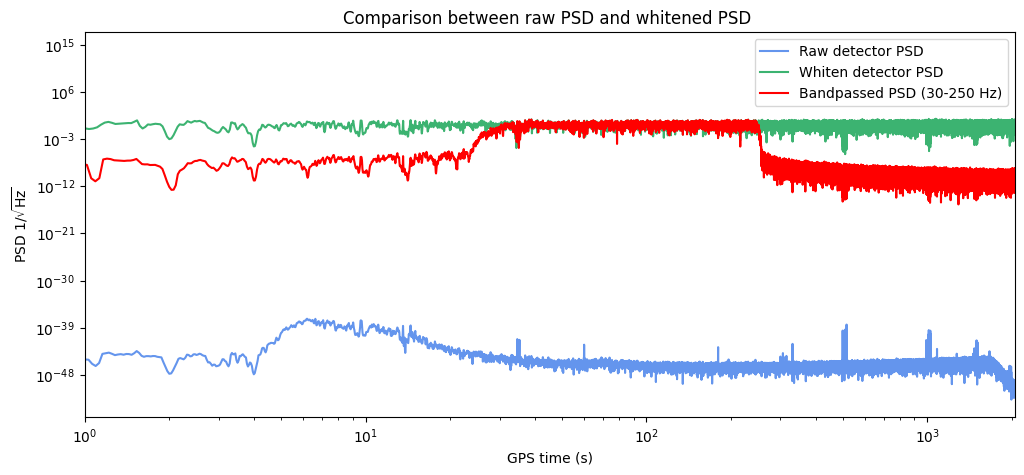

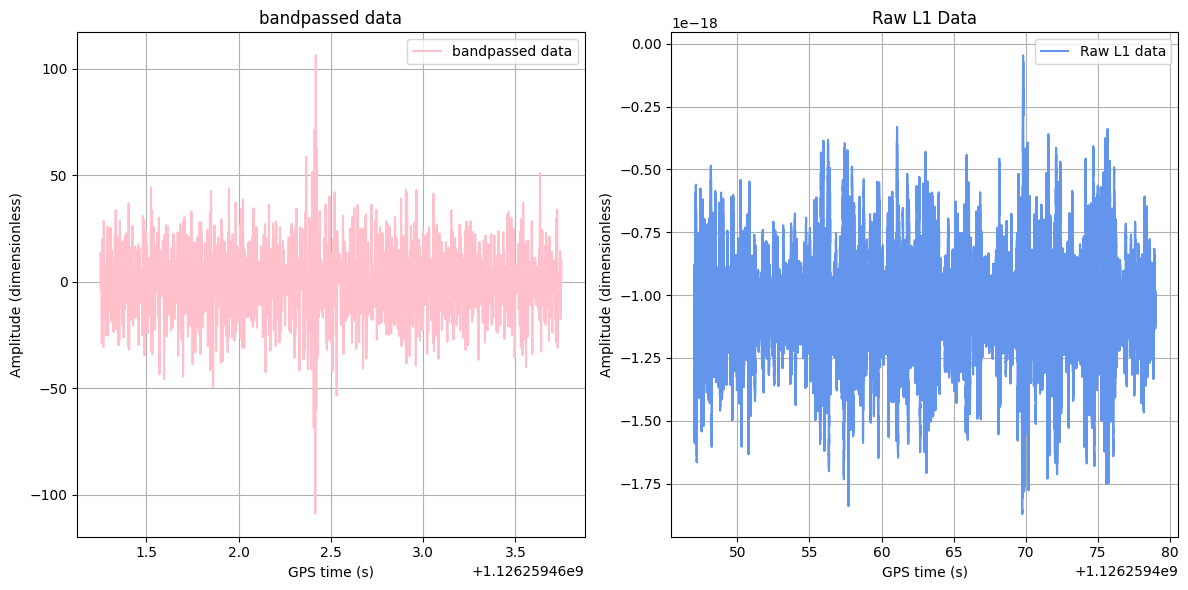

In [66]:
#-----Estimate the PSD of the bandpassed data and plot it together with the raw PSD and the whitened PSD.-----

high_d=whiten_d.highpass_fir(30, order=512, beta=5.0, remove_corrupted=True) #first apply the high pass filter.
bandpass_d=high_d.lowpass_fir(250, order=512, beta=5.0, remove_corrupted=True) #then apply on the high filtered data, the low pass filter.

#Apply the psd function to the bandpassed data
psd_bandpass = bandpass_d.filter_psd(bandpass_d.duration, bandpass_d.delta_f, 1)

#Plotting
plt.figure(figsize = (12, 5))
plt. loglog(psd.get_sample_frequencies(), psd, label='Raw detector PSD', color='cornflowerblue') #plot raw
plt. loglog(psd_whitened.get_sample_frequencies(), psd_whitened, label= 'Whiten detector PSD', color='mediumseagreen') #plot whitened
plt. loglog(psd_bandpass.get_sample_frequencies(), psd_bandpass, label= 'Bandpassed PSD (30-250 Hz)', color='red') #plot bandpassed

plt.xlim(1, data.sample_rate/2)
plt.xlabel('GPS time (s)')
plt.ylabel(r'PSD $1/\sqrt{\text{Hz}}$')
plt.title('Comparison between raw PSD and whitened PSD ')
plt.legend()

#What is the bandpass doing?
#The bandpass filter removes low-frequency noise below 30 Hz and high-frequency noise above 250 Hz,
#leaving a cleaner signal in the gravitational wave-sensitive range.

#-----Plot the bandpassed data cropping 12s on the left and 13s on the right. What can you see?------
#Compare this to the raw data. What frequencies dominate in each case?

#crop the data
bandpass_crop = bandpass_d.crop(12, 13)

#Plotting
plt.figure(figsize=(12, 6))

#Subplot 1: bandpassed data
plt.subplot(1, 2, 1)
plt.plot(bandpass_crop.sample_times, bandpass_crop, label='bandpassed data', color='pink')
plt.xlabel('GPS time (s)')
plt.ylabel('Amplitude (dimensionless)')
plt.title('bandpassed data')
plt.legend()
plt.grid(True)

#Subplot 2: raw data
plt.subplot(1, 2, 2)  # (rows, columns, index)
plt.plot(data.sample_times, data, label='Raw L1 data', color='cornflowerblue')
plt.xlabel('GPS time (s)')
plt.ylabel('Amplitude (dimensionless)')
plt.title('Raw L1 Data')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#What frequencies dominate in each case?

#the frequencies dominating fall within the bandpass range, and the main thing that stands out is that big spike.
#since it survives the filtering, it most likely means the event is a real signal, possibly a gravitational wave.
#so the bandpass filter helps clean things up and makes the real signal way easier to spot.

**Exercise 5:** Last but not least, we generate a spectrogram (time-frequency representation) using [this](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.qtransform) function.

_Hint_: logfsteps=200, qrange=(110, 110), frange=(20, 512), vmax=3.5 as it is standard

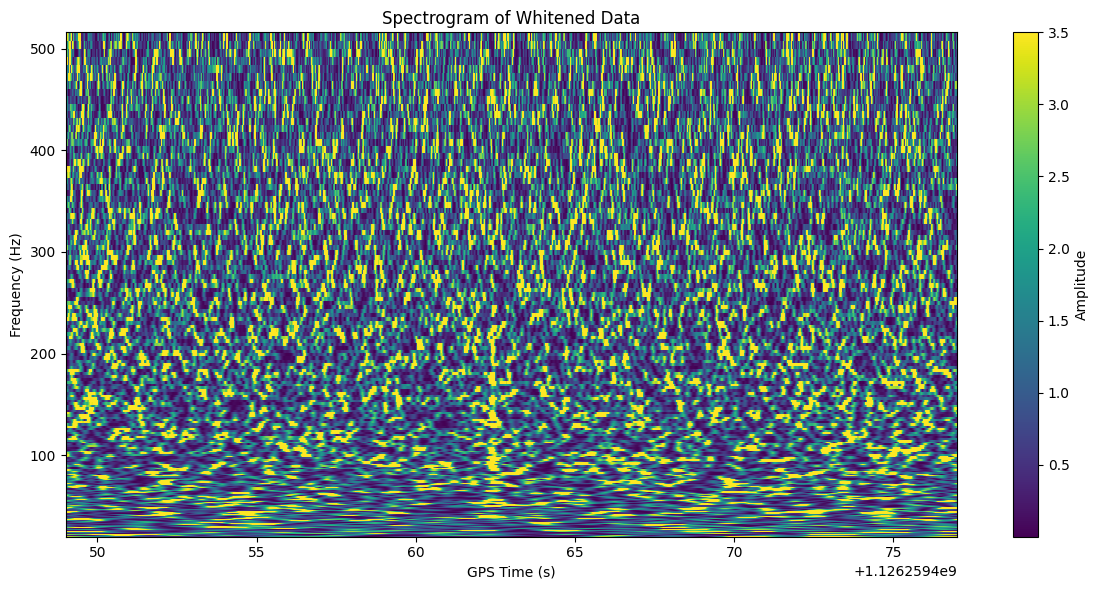

In [75]:
#applying the function to the whitened data (using, logfsteps=200, qrange=(110, 110), frange=(20, 512), vmax=3.5)
#it results in multiple thing: the time, the frequencies and the two dimensional interpolated qtransform = qplane.
times, freqs, qplane = whiten_d.qtransform(delta_t=1/whiten_d.sample_rate, delta_f=None, logfsteps=200, frange=(20, 512), qrange=(110, 110), mismatch=0.2, return_complex=False)

#Plotting of the spectogram using pcolormesh and the result of the function as input.
plt.figure(figsize=(12, 6))
plt.pcolormesh(times, freqs, qplane, shading='auto', cmap='viridis', vmax=3.5)
plt.colorbar(label="Amplitude")
plt.xlabel('GPS Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of Whitened Data')
plt.tight_layout()
plt.show()
#We can see a yellow spike

As we have seen, the detector has a given "noise budget" given  by the power spectral density (PSD), $S_{n}(f)$, according to its specific design. Let's see how the detectors will improve in the next observing runs.

**Bonus track:** From the `sensitivity_curves` folder [load](https://pycbc.org/pycbc/latest/html/pycbc.psd.html#pycbc.psd.read.from_txt) the PSD s:

- Third observing run of H1: `aligo_O3actual_H1.txt`
- Third observing run of L1: `aligo_O3actual_L1.txt`
- Third observing run of V1: `avirgo_O3actual.txt`
- Simulated fourth observing run of LIGO: `aligo_O4high.txt`

Note that these PSDs are from [LIGO public website](https://dcc.ligo.org/ligo-t2000012/public). Also read the PSD of [Einstein Telescope](https://pycbc.org/pycbc/latest/html/pycbc.psd.html#pycbc.psd.analytical.EinsteinTelescopeP1600143) (ET) and [Cosmic Explorer](https://pycbc.org/pycbc/latest/html/pycbc.psd.html#pycbc.psd.analytical.CosmicExplorerP1600143) (CE)

Plot all these PSDs. What can you say about ET and CE improvements?

_Hint_: Minimum frequency is 10 Hz, sampling rate 8192 Hz and duration is 16s.


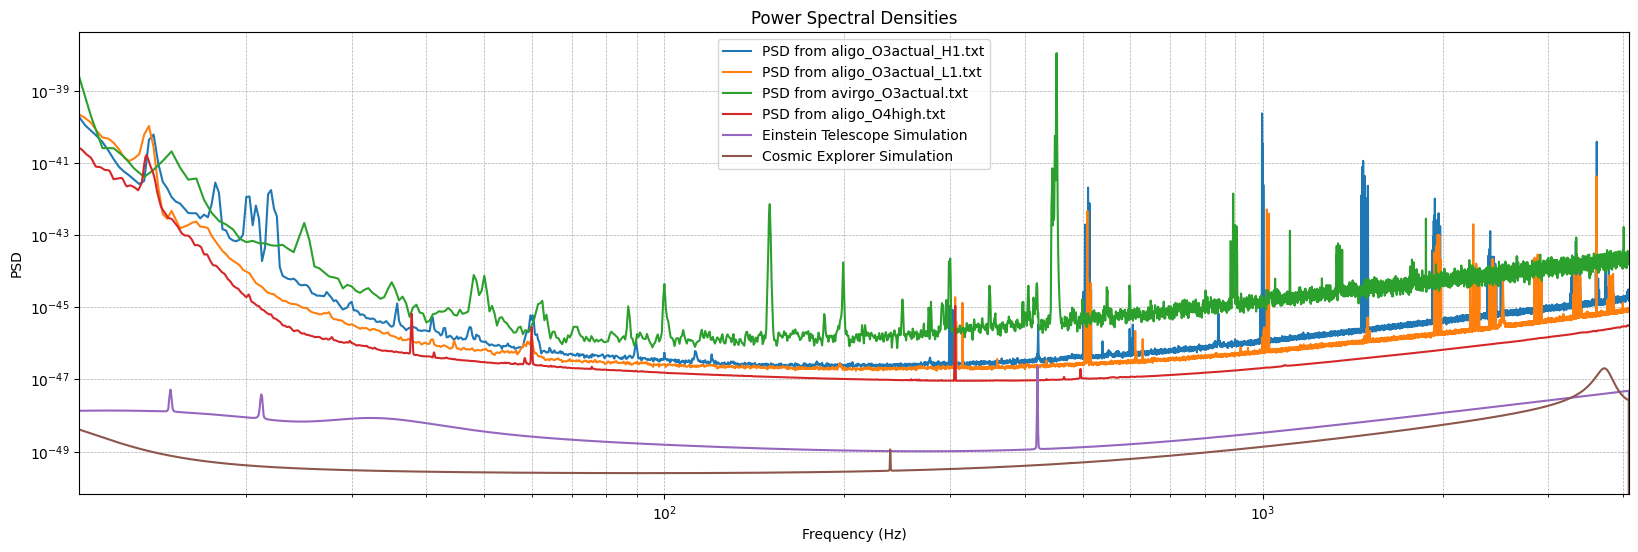

In [25]:
import os

#defining the access to the data from the sensitivity_curves folder.
aligo_O3actual_H1 = "https://dcc.ligo.org/public/0165/T2000012/002/aligo_O3actual_H1.txt"
aligo_O3actual_L1 = "https://dcc.ligo.org/public/0165/T2000012/002/aligo_O3actual_L1.txt"
avirgo_O3actual = "https://dcc.ligo.org/public/0165/T2000012/002/avirgo_O3actual.txt"
aligo_O4high = "https://dcc.ligo.org/public/0165/T2000012/002/aligo_O4high.txt"

#grouping them in a list for the loop
files = [aligo_O3actual_H1,aligo_O3actual_L1,avirgo_O3actual,aligo_O4high]

#defining variables using hint
duration = 16
sampling_rate = 8192
delta_f = 1 / duration
low_freq_cutoff = 10.5
length = int(sampling_rate * duration / 2)

# Plot PSDs
plt.figure(figsize=(20, 6))

# creating a loop to go trough each data file
for file in files:

    #compute the psd of each data file with it's corresponding frequencies, and label.
    psd = pycbc.psd.read.from_txt(file, length, delta_f, low_freq_cutoff, is_asd_file=True)
    frequency = psd.get_sample_frequencies()
    filename = os.path.basename(file)

    #plot with label
    plt.loglog(frequency, psd, label=f"PSD from {filename}")

#computing the psd of the Einstein Telescope (ET) and Cosmic Explorer (CE) using their respective simulation function.
psd_et = pycbc.psd.analytical.EinsteinTelescopeP1600143(length, delta_f, low_freq_cutoff)
psd_ce = pycbc.psd.analytical.CosmicExplorerP1600143(length, delta_f, low_freq_cutoff)

#frequency array for the simulated PSDs
frequency_sim = psd_et.get_sample_frequencies()

#plot the simulated PSDs
plt.loglog(frequency_sim, psd_et, label="Einstein Telescope Simulation", linestyle="-")
plt.loglog(frequency_sim, psd_ce, label="Cosmic Explorer Simulation", linestyle="-")


#plotting
plt.xlim(10.5, sampling_rate / 2)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD")
plt.title("Power Spectral Densities")
plt.legend()  # Ensure legend is displayed
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()

#What can you say about ET and CE improvements?

#from the plot, the power spectral densities for the Einstein Telescope (ET) Simulation and Cosmic Explorer (CE) Simulation
#are significantly lower than the other detectors. This indicates that ET and CE are expected to have much better sensitivity
#across a wide frequency range. It can also mean they will be able to detect weaker gravitational waves.

Good job! This is the end of the second part. Maybe you can go for a break?